# <center>**Lab 04 : Linear Regression** </center>
**Subject**        : Applied Mathematics and Statistics for Information Technology <br>
**Student Name**   : Phạm Hồng Gia Bảo <br>
**Student ID**     : 21127014 <br>
**Class**          : 21CLC07 <br>

In [40]:
import numpy as np
import matplotlib.pyplot as plt

### `0. Requirement`


The following example describes the expenditure (in dollars) on recreation per month by employees at a certain company, and their corresponding monthly incomes.


| Expenditure ($)	 | 2400  | 2650  | 2350  | 4950  | 3100  | 2500  | 5106  | 3100  | 2900  |
|---|---|---|---|---|---|---|---|---|---|
|  Income ($) | 41200 | 50100 | 52000 | 66000 | 44500 | 37700 | 73500 | 37500 | 56700 |


- Calculate the linear regression line for the data
- Using the equation for the linear regression that you calculated, estimate the monthly income of an employee at this company who spends 5000 dollars per month on recreation. Is this interpolation or extrapolation? Why?

### `1. Library` 

In [41]:
import numpy as np
import matplotlib.pyplot as plt

### `2. Data Visualiztion`

In [42]:
# Expenditure ($) - Income ($)
expenditure = np.array([2400, 2650, 2350, 4950, 3100, 2500, 5106, 3100, 2900])
income = np.array([41200, 50100, 52000, 66000, 44500, 37700, 73500, 37500, 56700])

In [43]:
def plot_data(x, y):
    plt.scatter(x, y, color='g', marker='o')
    plt.xlabel('Expenditure ($)')
    plt.ylabel('Income ($)')
    plt.grid()
    plt.show()


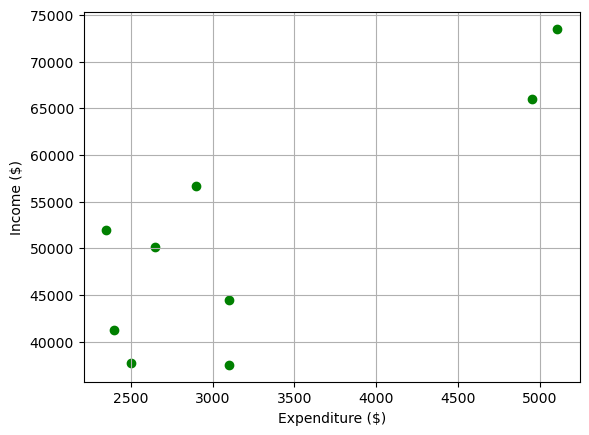

In [44]:
plot_data(expenditure, income)

### `OLS Linear Regression`

In [45]:
class OLSLinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T
        self.w = X_pinv @ y
        return self

    def get_params(self):
        return self.w

    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)

def preprocess(x, y):
    X = np.hstack((np.ones((x.shape[0], 1)), x.reshape(-1, 1)))
    return X, y.reshape(-1, 1)

X, y = preprocess(expenditure, income)

lr = OLSLinearRegression().fit(X, y)

print(lr.get_params())

[[1.99336007e+04]
 [9.62959779e+00]]


### `3. Visualization of data`

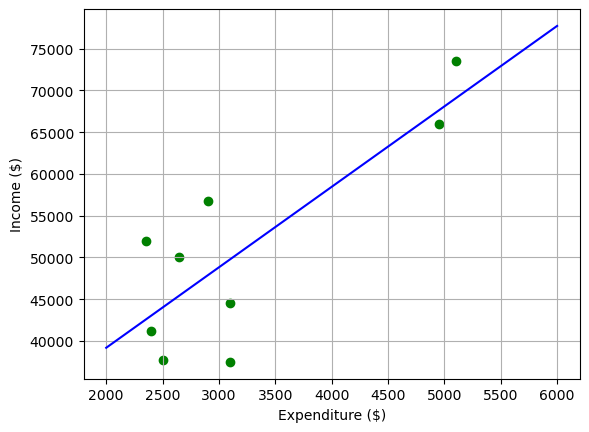

In [46]:
def plot_regression(lr, x, y):
    # Plot data
    plt.scatter(x, y, color='g', marker='o')

    # Plot regression line
    x_para = np.linspace(2000, 6000)
    X_para = np.hstack((np.ones((x_para.shape[0], 1)), x_para.reshape(-1, 1)))
    y_pred = lr.predict(X_para)
    plt.plot(x_para, y_pred, color='b')

    plt.xlabel('Expenditure ($)')
    plt.ylabel('Income ($)')
    plt.grid()
    plt.show()

plot_regression(lr, expenditure, income)

### `4. Using the equation for the linear regression that you calculated, estimate the monthly income of an employee at this company who spends 5000 dollars per month on recreation. Is this interpolation or extrapolation? Why?`

In [47]:
# Estimate the monthly income for an expenditure of $5000
expenditure_new = 5000
X_new = np.array([1, expenditure_new]).reshape(1, -1)
income_new = lr.predict(X_new)[0]
print("The estimation for monthly income of an employee at this company who spends $5000 per month on recreation: $", income_new)

The estimation for monthly income of an employee at this company who spends $5000 per month on recreation: $ 68081.5896767594


##### This is an extrapolation because the expenditure $5000 is out of scope for the initial data. The initial data expenditure which max value is $5106. Therefore, the estimation for the monthly income of an employee at this company who spends 5000 dollars is out of range for the available data. However, extrapolation can still be reasonable if there is reason to believe that the relationship between expenditure and income is linear and continues beyond the range of data provided.